# Statistik zur Entwicklung in Deutschland

In [1]:
# Bibliotheken
import numpy as np
from itertools import *
import matplotlib.pyplot as plt
from scipy.stats import kde
from scipy import stats
from scipy.stats import skew
from scipy.stats import powerlognorm
import pandas as pd
import xlrd # htps://libraries.io/conda/xlrd
from statistik import Statistik, Ausgleich
statist=Statistik()
ausgleich=Ausgleich()

# 1. Quellen
-----------------------------------------
### 1.1 Bevölkerung
1.1: 
https://de.statista.com/statistik/daten/studie/2861/umfrage/entwicklung-der-gesamtbevoelkerung-deutschlands/ 
1.2: 
https://www.bib.bund.de/DE/Fakten/Fakt/B02-Bevoelkerungsstand-1950-Vorausberechnung.html

### 1.2 Brutoinnlandsprodukt BIP
2.1: https://de.statista.com/statistik/daten/studie/1251/umfrage/entwicklung-des-bruttoinlandsprodukts-seit-dem-jahr-1991/

- Deutschland wird ganzheitlich betrachtet. Das trifft offensichtlich auch für die Zeit vor 1990 zu. Die bevölkerungsstatistik 1.1 beginnt ers mit dem Jahr 1991. Die Statistik 2.1 zum Brutoinlandsprodult nimmt keine Differenzierung zwischen BRD und DDR vor.


### 1.3 Schulden
https://www.deutschlandinzahlen.de/tab/bundeslaender/oeffentliche-haushalte/schulden/schulden-je-einwohner
https://de.statista.com/statistik/daten/studie/154798/umfrage/deutsche-staatsverschuldung-seit-2003/
https://de.statista.com/statistik/daten/studie/4778/umfrage/schulden-der-haushalte-bund-laender-und-gemeinden/


## 2. Daten aus Excel einlesen

In [2]:
df = pd.read_excel (r'./daten/DEUTSCHLAND_Mrd.xlsx', sheet_name='Finanzen_in_Mrd')
df1=np.asarray(df)

In [3]:
DZ=5      # Veratz zur Excelnummerierung der Zeilen
Z0=DZ     # 1. Datenzeile in der Exeltabelle
Datenzeilen=72
Z1=Datenzeilen+DZ  # letzte Datenzeile in der Exeltabelle
jahre=    df1[Z0:Z1,1].astype(float)
einwohner=df1[Z0:Z1,2].astype(float)
schulden= df1[Z0:Z1,5].astype(float)
neuschulden=df1[Z0:Z1,6].astype(float)
BIP=      df1[Z0:Z1,7].astype(float)
steuern=df1[Z0:Z1,8].astype(float)

In [4]:
print(f"{'NR':3s} | {'Jahr':5s} | {'Einwohner':10s} | {'Schulden':8s} | {'Neuschulden':11s} | {'BIP ':8s} | {'Steuern':8s}" ) 
print(f"{'--':3s} | {'  --':5s} | {'  Mill.  ':10s} | {'  Mrd.  ':8s} | {'    Mrd.   ':11s} | {'Mrd.':8s} | {'Mrd.':8s}" ) 
for i in range(Datenzeilen):
    print(f"{i:3d} | {jahre[i]:5.0f} | {einwohner[i]:10.3f} | {schulden[i]:8.3f} | {neuschulden[i]:11.3f} | {BIP[i]:8.2f} | {steuern[i]:8.2f}" ) 


NR  | Jahr  | Einwohner  | Schulden | Neuschulden | BIP      | Steuern 
--  |   --  |   Mill.    |   Mrd.   |     Mrd.    | Mrd.     | Mrd.    
  0 |  1950 |     68.700 |    9.574 |       9.574 |    49.69 |     9.61
  1 |  1951 |     69.100 |   10.748 |       1.174 |    61.00 |    12.88
  2 |  1952 |     69.400 |   12.276 |       1.528 |    69.75 |    15.96
  3 |  1953 |     69.800 |   14.774 |       2.498 |    74.92 |    17.55
  4 |  1954 |     70.100 |   18.313 |       3.539 |    80.41 |    18.35
  5 |  1955 |     70.500 |   21.357 |       3.044 |    91.89 |    20.32
  6 |  1956 |     70.900 |   22.358 |       1.001 |   101.58 |    22.77
  7 |  1957 |     71.400 |   23.159 |       0.801 |   110.72 |    24.51
  8 |  1958 |     71.900 |   23.992 |       0.833 |   118.95 |    25.66
  9 |  1959 |     72.400 |   25.463 |       1.471 |   130.31 |    28.96
 10 |  1960 |     73.000 |   28.999 |       3.536 |   154.77 |    34.07
 11 |  1961 |     73.700 |   32.216 |       3.217 |   169.60 |  

In [5]:
print(len(jahre), len(einwohner), len(BIP))

72 72 72


### Diagramm

In [6]:
# Quelle: https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Einheitskosten2016=1907.5 # Mdr. €
Einheitsnutzen2016=2760.51 # Mrd. €
Bilanzgewinn2016=Einheitsnutzen2016-Einheitskosten2016


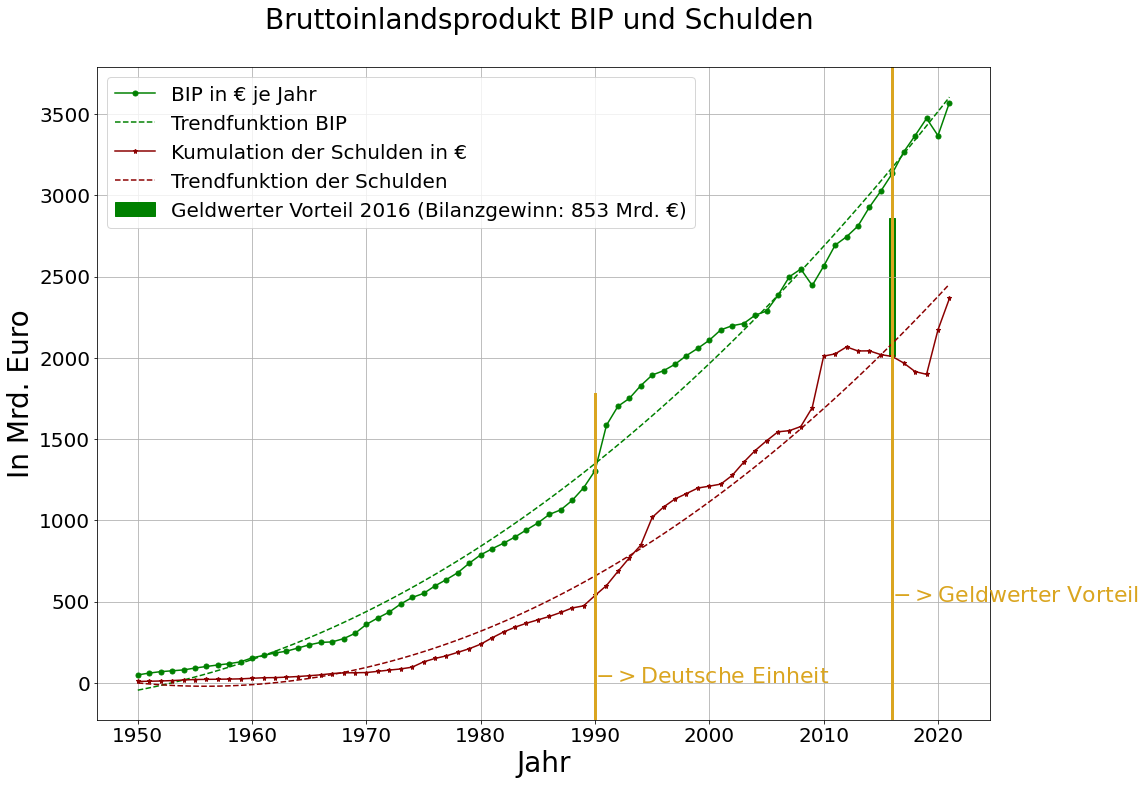

In [7]:
fig=plt.figure(figsize=(16,12))

# Tasächlicher Verlauf BIP
plt.plot(jahre, BIP, marker='o', color='green',label='BIP in € je Jahr', markersize=5)
# Ausgleichsfunktion BIP
X,Y=ausgleich.quadratisch(jahre, BIP) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion BIP', markersize=1)

# Tasächlicher Verlauf Schulden
plt.plot(jahre, schulden, marker='*', color='darkred',label='Kumulation der Schulden in € ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, schulden) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Schulden', markersize=1)

# Wendezeitpunkt
plt.axvline(x=1990, ymin=0, ymax=0.5, color="goldenrod", linewidth=3)
plt.text(1990, 0, '$->$Deutsche Einheit', fontsize = 22, color='goldenrod')
# Schulden 1990
# Geldwerter Vorteil der Deutschen Einheit
plt.axvline(x=2016, ymin=0, ymax=1, color="goldenrod", linewidth=3)
plt.text(2016, 500, '$->$Geldwerter Vorteil', fontsize = 22, color='goldenrod')
plt.arrow(2016,schulden[66]+Bilanzgewinn2016,0,-Bilanzgewinn2016, width=0.5,length_includes_head=True, head_width=0,head_length=5,shape='full', color='green', label=f'Geldwerter Vorteil 2016 (Bilanzgewinn: {Bilanzgewinn2016:.0f} Mrd. €)' )

# Beschriftung
plt.title('Bruttoinlandsprodukt BIP und Schulden \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Mrd. Euro', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('BildErgebnisse/BIPundSchulden_gesamt.png')
plt.show()

## 3. Daten zur Deutsche Einheit

### 3.1 Deutsche Einheit 
- Kosten der Deutschen Einheit
https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/25075578.html

"Und auch in den erweiterten Chefetagen spielen Ostdeutsche kaum eine Rolle."

"In der Politik sieht es nicht besser aus. Anfang dieses Jahres gab es in elf von 14 Ministerien keinen Abteilungsleiter aus Ostdeutschland; in den anderen drei war es jeweils einer. Insgesamt kamen somit drei von 120 Abteilungsleitern aus den neuen Bundesländern."

In [8]:
''' [nach https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/250,
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/] '''
DeutscheEinheitKosten= [1600, 1720]  # Mdr. € 75578.html

VermögenProHaushalt_ost= 23400  # €
VermögenProHaushalt_west= 92500 # €
# Kirtaquote Kinder bis zu drei Jahren
Kitaquote_ost= 52 # %
Kitaquote_west=30 # %
# Renten nach 45 Jahren mit Durchschnittsverdienst und Einzahlung in Rentenversicherung
Standardrente_ost=1435 # €
Standardrente_ost=1487 # € allerdings kommen Betriebsrenden und sonstige Alterseinkünfte vermehrt hinzu.
# Gehälter und Arbeitszeiten
Gehaltsgefaelle_west_ost=17 # %
Arbeitsstunden_ost = (1357+1327+1373+1355+1370)/5
Arbeitsstunden_west= (1287+1339+1279+1286+1276+1275+1306+1269+1314+1308)/10
Arbeitsdifferenz=(Arbeitsstunden_ost-Arbeitsstunden_west)/(Arbeitsstunden_ost+Arbeitsstunden_west) *100
print(Arbeitsstunden_ost, Arbeitsstunden_west, Arbeitsdifferenz,'%')

1356.4 1293.9 2.358223597328604 %


### 3.2 Deutsche Einheit - Kosten-Nutzen

https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/

"Wie hoch war der Preis der Einheit? Heinrich Best und Ronald Gebauer meinen: Die geldwerten Vorteile der deutschen Wiedervereinigung bis zum Jahr 2016 überwiegen die Kosten, die bei einer fortwährenden Teilung aufgelaufen wären."

In [9]:
Arbeitsproduktivität_ost_west=50 # %  "Arbeitsproduktivität betrug in der DDR nach DIW-Schätzungen nur etwa ca. 50 Prozent des westdeutschen Niveaus.""
Stillegung_der_Betriebe_ost=30 # % , (vgl. Fischer / Hax / Schneider 1993, S. 138).
BIP_ost_1991=43 # %
BIP_ost_2018=75 # %

Finazierung_west_ost=[60, 80] # Mrd./Jahr

"Die hohen West-Ost-Transfers wirkten außerdem wie ein gigantisches Konjunkturpaket für Firmen, die ebenfalls überwiegend in den westlichen Bundesländern und hier speziell im Bausektor angesiedelt waren."

In [10]:
''' KOSTEN
[nach https://www.tagesspiegel.de/politik/30-jahre-nach-dem-mauerfall-wie-es-um-deutschlands-einheit-bestellt-ist/250,
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/,
Einmalige Sonderkosten: Schulden der DDR, Umstellung auf D-Mark, Abzug der roten Armee] '''
DeutscheEinheitKosten= [1600, 1720, 1720]  # Mdr. € 75578.html

''' NUTZEN
https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Abawanderung -> zusätzliche Wirtschaftskraft im Westen
zusätzliche Steuereinahmen  im Westen auch aufgrund des westdeutschen Exportüberschusses
'''
Abwanderung_ost_west= 5 # Mio 
Abwanderung_west_ost= 2,5 #Mio.
# Rücktransfer: Vorteile für den Westen Deutschlands
Rücktransfer_2014=1300 # Mdr. € # Ökonomen Ulrich Blum zufolge bis 2014
Rücktransfer_2016=1400 # Mdr. €

# https://www.mdr.de/geschichte/war-die-ddr-pleite100.html
StaatsAuslandsschuldenDDR1990= 20,3/2 # in Mrd €  "Bilanz der Deutschen Bundesbank aus dem Jahr 1999 festhält - lediglich 19,9 Milliarden Valutamark."
SchuldenDDR1990=  86,3/2 # in Mrd. €
SchuldenBRD1990= 929/2 # Mrd.€ ''' noch zu setzen '''
SchuldenDDRjeBuerger1990= 5384/2 # in 1000 €
SchuldenBRDjeBuerger1990=15000/2 # in 1000 €

#### Kosten der Deutschen Teilung 45 bis 90

In [15]:
# Kosten der Deutschen Teilung 1945 bis 1990
Teilungskosten_45_90= 498,51       # Mrd. €
Verteidigungshaushalt_BRD_70= 3.2 # % # des BIP
Verteidigungshaushalt_D_2013= 1.2 # % # des BIP
Einsparung_bis2018=969 # Mrd.€
# Quelle: https://www.bpb.de/themen/deutsche-einheit/lange-wege-der-deutschen-einheit/47534/die-kosten-und-ertraege-der-wiedervereinigung-deutschlands/
Einheitskosten2016=1907.5 # Mdr. €
Einheitskosten2016jeBuerger=Einheitskosten2016/einwohner[66]*1000 # in €
Einheitsnutzen2016=2760.51 # Mrd. €
Einheitsnutzen2016jeBuerger=Einheitsnutzen2016/einwohner[66]*1000 # in €
Bilanzgewinn2016=Einheitsnutzen2016-Einheitskosten2016
Bilanzgewinn2016jeBuerger=Bilanzgewinn2016/einwohner[66]*1000 
Sondervermoegen_Bundeswehr2022jeBuerger=100/einwohner[71]*1000 

print(Einheitskosten2016jeBuerger, Einheitsnutzen2016jeBuerger)
print(Bilanzgewinn2016,Bilanzgewinn2016jeBuerger)

23121.21212121212 33460.72727272728
853.0100000000002 10339.515151515154


#### Kosten Nutzen
"Auf dem Weg zu einer Bilanz
Der thematische Schwerpunkt dieses Beitrags lag auf einer vorläufigen Bilanzierung der Kosten und Erträge der deutschen Einheit. Wie gesehen, sind die Kosten, die mit der Einheit Deutschlands verbunden sind, enorm hoch. Das gilt sowohl für die rund 1,72 Billionen Euro, die sich als Nettotransfers bis zum Jahr 2016 beziffern lassen, als auch für die einmaligen Sonderkosten, mit mindestens ca. 187,5 Mrd. Euro. Zusammen beläuft sich die Summe dieser Zahlungen auf rund 1,9 Billionen Euro. Damit noch nicht genug, denn auch in Zukunft werden weitere Transfers notwendig sein. Für eine Bilanzierung sind von den Kosten jedoch zum gegenwärtigen Zeitpunkt die Beträge aus Steuern und Sozialbeiträgen abzuziehen, die von den im Saldo 2,5 Mio. Ostdeutschen in den alten Bundesländern bisher entrichtet wurden. Ebenfalls müssen die Steuereinnahmen, die durch die Exportüberschüsse westdeutscher Unternehmen entstanden sind, abgezogen werden. Zusammengenommen sind das geschätzt 1,4 Billionen Euro. Zieht man zusätzlich die teilungsbedingten Kosten (498,51 Mrd. Euro) und den Betrag ab, der sich durch die geopolitisch und vereinigungsbedingte Reduzierung der Verteidigungskosten (bis 2016 ca. 862 Mrd. Euro) schließt die vorläufige Bilanz der deutschen Einheit mit einem positiven Ergebnis von nominal ca. 880 Mrd. Euro.
Das bedeutet, dass die geldwerten Vorteile der deutschen Wiedervereinigung bis zum Jahr 2016, die Kosten überwiegen, die bei einer fortwährenden Teilung aufgelaufen wären."




# 4. Brutoinlandsprodukt BIP, Steuern und Schulden pro Bürger(in) - Grafik
BIP:
https://de.statista.com/statistik/daten/studie/4878/umfrage/bruttoinlandsprodukt-von-deutschland-seit-dem-jahr-1950/

Bevölkerung:
https://de.statista.com/statistik/daten/studie/2861/umfrage/entwicklung-der-gesamtbevoelkerung-deutschlands/
https://www.bib.bund.de/DE/Fakten/Fakt/B02-Bevoelkerungsstand-1950-Vorausberechnung.html

In [12]:
# BIP
BIPperEinw= np.zeros(len(BIP))
np.divide(BIP,einwohner, BIPperEinw)
BIPperEinw *= 1000 # ummrechnung in €
# Schulden
schulden_perEinw=np.zeros(len(schulden))
np.divide(schulden,einwohner, schulden_perEinw)
schulden_perEinw *= 1000 # Umrechnung in €
# Neu-Schulden
neuschulden_perEinw=np.zeros(len(neuschulden))
np.divide(neuschulden,einwohner, neuschulden_perEinw)
neuschulden_perEinw *= 1000 # Umrechnung in €
# Steuern
steuern_perEinw=np.zeros(len(steuern))
np.divide(steuern,einwohner, steuern_perEinw)
steuern_perEinw *= 1000 # Umrechnung in €

In [13]:
print(f"{'Nr.':3s} | {'Jahr':5s} | {'Schulden-Kumulation':20s} | {'Neu-Schulden      ':20s} | {'BIP               ':20s} | {'Steuern           ':11s}" ) 
print(f"{'-- ':3s} | {'  --':5s} | {'  € je Einwohner   ':20s} | {'€ Einwohner & Jahr':20s} | {'€ Einwohner & Jahr':20s} | {'€ Einwohner & Jahr':11s}"  ) 
for i in range(Datenzeilen):
    print(f"{i:3d} | {jahre[i]:5.0f} | {schulden_perEinw[i]:20.3f} | {neuschulden_perEinw[i]:20.3f} | {BIPperEinw[i]:20.3f} | {steuern_perEinw[i]:20.2f}" ) 


Nr. | Jahr  | Schulden-Kumulation  | Neu-Schulden         | BIP                  | Steuern           
--  |   --  |   € je Einwohner     | € Einwohner & Jahr   | € Einwohner & Jahr   | € Einwohner & Jahr
  0 |  1950 |              139.360 |              139.360 |              723.290 |               139.88
  1 |  1951 |              155.543 |               16.990 |              882.779 |               186.40
  2 |  1952 |              176.888 |               22.017 |             1005.043 |               229.97
  3 |  1953 |              211.662 |               35.788 |             1073.352 |               251.43
  4 |  1954 |              261.241 |               50.485 |             1147.076 |               261.77
  5 |  1955 |              302.936 |               43.177 |             1303.404 |               288.23
  6 |  1956 |              315.346 |               14.118 |             1432.722 |               321.16
  7 |  1957 |              324.356 |               11.218 |         

C:\Users\horst\AppData\Local\Temp\ipykernel_7584\2666421583.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(1990, -2000, '$->$Deutsche Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white', facecolor='white', alpha=0.5))
C:\Users\horst\AppData\Local\Temp\ipykernel_7584\2666421583.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.text(2010, 5000, '$->$Geldwerter Vorteil\n der Deutschen Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white',facecolor='white', alpha=0.5))
C:\Users\horst\AppData\Local\Temp\ipykernel_7584\2666421583.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Korona', xy=(2020,schulden_perEinw[70]), xycoords= 'data', xytext=(2020,28500), fontsize = 14,
C:\Users\horst\AppData\Local\Temp\ipykernel_7584\2666421583.py:39: UserWarning: Setting the 'color' pro

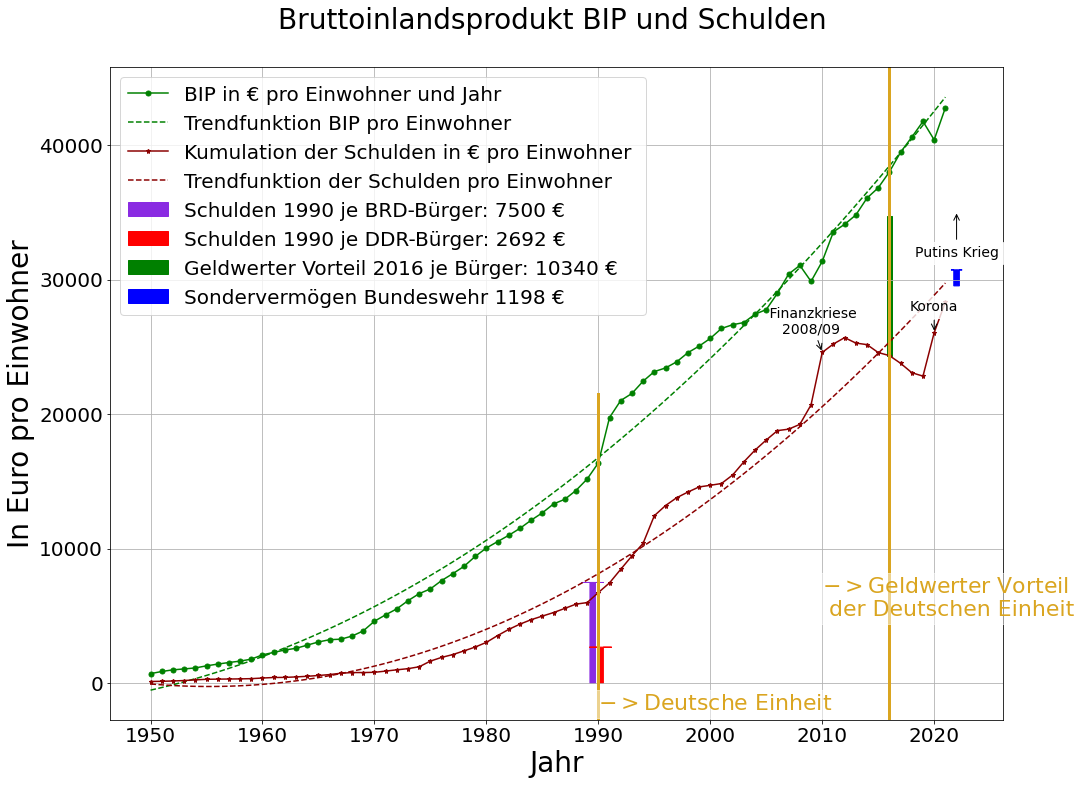

In [21]:
fig=plt.figure(figsize=(16,12))

# Tasächlicher Verlauf BIP
plt.plot(jahre, BIPperEinw, marker='o', color='green',label='BIP in € pro Einwohner und Jahr', markersize=5)
# Ausgleichsfunktion BIP
X,Y=ausgleich.quadratisch(jahre, BIPperEinw) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion BIP pro Einwohner', markersize=1)

# Tasächlicher Verlauf Schulden
plt.plot(jahre, schulden_perEinw, marker='*', color='darkred',label='Kumulation der Schulden in € pro Einwohner ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, schulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Schulden pro Einwohner', markersize=1)

# Wendezeitpunkt
plt.axvline(x=1990, ymin=0, ymax=0.5, color="goldenrod", linewidth=3)
plt.text(1990, -2000, '$->$Deutsche Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white', facecolor='white', alpha=0.5))
# Schulden 1990
plt.arrow(1990-0.5,0,0,SchuldenBRDjeBuerger1990, width=0.5,length_includes_head=True, head_width=2,head_length=5, color='blueviolet', label=f'Schulden 1990 je BRD-Bürger: {SchuldenBRDjeBuerger1990:.0f} €' )
plt.arrow(1990+0.2,0,0,SchuldenDDRjeBuerger1990, width=0.5,length_includes_head=True, head_width=2,head_length=3, color='red',        label=f'Schulden 1990 je DDR-Bürger: {SchuldenDDRjeBuerger1990:.0f} €' )
# Geldwerter Vorteil der Deutschen Einheit
plt.axvline(x=2016, ymin=0, ymax=1, color="goldenrod", linewidth=3)
plt.text(2010, 5000, '$->$Geldwerter Vorteil\n der Deutschen Einheit', fontsize = 22, color='goldenrod', bbox=dict(color='white',facecolor='white', alpha=0.5))
plt.arrow(2016,schulden_perEinw[66]+Bilanzgewinn2016jeBuerger,0,-Bilanzgewinn2016jeBuerger, width=0.5,length_includes_head=True, head_width=0,head_length=5,shape='full', color='green', label=f'Geldwerter Vorteil 2016 je Bürger: {Bilanzgewinn2016jeBuerger:.0f} €' )
# Sonderausgaben für Verteidigung --> https://www.tagesschau.de/inland/innenpolitik/bundeswehr-sondervermoegen-scholz-101.html
plt.arrow(2022,schulden_perEinw[71]+Sondervermoegen_Bundeswehr2022jeBuerger,0,Sondervermoegen_Bundeswehr2022jeBuerger,
          width=0.5,length_includes_head=True, head_width=1,head_length=10, color='blue',
          label=f'Sondervermögen Bundeswehr {Sondervermoegen_Bundeswehr2022jeBuerger:.0f} €' )


# Annotationen
plt.annotate(' Finanzkriese\n2008/09', xy=(2010,schulden_perEinw[60]), xycoords= 'data', xytext=(2009,28000), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top')
plt.annotate('Korona', xy=(2020,schulden_perEinw[70]), xycoords= 'data', xytext=(2020,28500), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top',
            bbox=dict(color='white',facecolor='white', alpha=0.8))
plt.annotate('Putins Krieg', xy=(2022,schulden_perEinw[70]+9000), xycoords= 'data', xytext=(2022,28500+4000), fontsize = 14,
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='top',
            bbox=dict(color='white',facecolor='white', alpha=0.8))

# Beschriftung
plt.title('Bruttoinlandsprodukt BIP und Schulden \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('BildErgebnisse/BIPundSchulden_perEinw.png')
plt.show()

## 5. Steuereinnahmen und Schulden

In [ ]:
fig=plt.figure(figsize=(16,12))


# Neu-Schulden
plt.plot(jahre, neuschulden_perEinw, marker='*', color='darkred',label='Neu-Schulden in € pro Einwohner und Jahr ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, neuschulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion der Neu-Schulden', markersize=1)
# Steuern
plt.plot(jahre, steuern_perEinw, marker='*', color='green',label='Steuereinnahmen in € pro Einwohner und Jahr ', markersize=5)
# Ausgleichsfunktion Schulden
X,Y=ausgleich.quadratisch(jahre, steuern_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion der Steuereinnahmen', markersize=1)
# Ausgaben=Steuern+Schulden
plt.plot(jahre, steuern_perEinw+neuschulden_perEinw, marker='*', color='gray',label='Ausgaben in € pro Einwohner und Jahr\n = Steuereinnahmen+Neuschulden', markersize=5)
# Ausgleichsfunktion Ausgaben
X,Y=ausgleich.quadratisch(jahre, steuern_perEinw+neuschulden_perEinw) #,   k=[0])
plt.plot(X, Y , '--', color='gray',label='Trendfunktion der Ausgaben', markersize=1)

# Beschriftung
plt.title('Ausgaben \n', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('Einnahmen_und_Schulden_perEinw.png')
plt.show()

### Bemerkungen zum Diagramm
- Bei den Werten für das Jahr 2021 handelt es sich um Schätzwerte. 

## 5. Bundesrentenzuschüsse & öffentliche Bildungsausgaben

In [ ]:
#DZ=  6      # Veratz zur Excelnummerierung der Zeilen
#Z0=  0+DZ   # 1. Datenzeile
#Z1= 71+DZ   # letzte Datenzeile


DZ=5      # Veratz zur Excelnummerierung der Zeilen
Z0=DZ     # 1. Datenzeile in der Exeltabelle
Datenzeilen=72
Z1=Datenzeilen+DZ  # letzte Datenzeile in der Exeltabelle
# Rentenzuschüsse in Mrd. € ----------------------------------
rentenzuschuesse_west = df1[Z0:Z1, 9].astype(float)
rentenzuschuesse_ost  = df1[Z0:Z1,10].astype(float)
rentenzuschuesse_MWS  = df1[Z0:Z1,11].astype(float)
# Bildungsausgaben ---------------------------------------------
bildungsausgaben_gesamt=df1[Z0:Z1,14].astype(float)
# Bevölkerung West, Ost
einwohner_west = df1[Z0:Z1, 3].astype(float)
einwohner_ost  = df1[Z0:Z1, 4].astype(float)

In [ ]:
print(f"{'Nr.':3s} | {'Jahr':5s} | {'Einw. west':10s} | {'Einw. ost':10s} | {'Rentenzusch. west':17s} | {'Rentenzusch. ost':16s} | {'Rentenz. MWS  ':14s} | {'Bildungsausgaben  ':11s}" ) 
print(f"{'-- ':3s} | {'  --':5s} | {' Mill.    ':10s} | {' ---     ':10s} | {'Mrd.  ':17s} | {'Mrd.':16s} | {'Mrd.':14s} | {'Mrd.':11s}" ) 
for i in range(Datenzeilen):
    print(f"{i:3d} | {jahre[i]:5.0f} | {einwohner_west[i]:10.3f} | {einwohner_ost[i]:10.3f} | { rentenzuschuesse_west[i]:17.3f} | { rentenzuschuesse_ost[i]:16.2f} | { rentenzuschuesse_MWS[i]:14.2f} | { bildungsausgaben_gesamt[i]:11.2f}" ) 


In [ ]:

rentenzuschuesse_west_proEinwohner=np.zeros(len(rentenzuschuesse_west))
np.divide(rentenzuschuesse_west,einwohner_west, rentenzuschuesse_west_proEinwohner)
rentenzuschuesse_west_proEinwohner *= 1000

rentenzuschuesse_ost_proEinwohner=np.zeros(len(rentenzuschuesse_ost))
np.divide(rentenzuschuesse_ost,einwohner_ost, rentenzuschuesse_ost_proEinwohner)
rentenzuschuesse_ost_proEinwohner *= 1000

rentenzuschuesse_MWS_proEinwohner=np.zeros(len(rentenzuschuesse_MWS))
np.divide(rentenzuschuesse_MWS,(einwohner_west+rentenzuschuesse_ost), rentenzuschuesse_MWS_proEinwohner)
rentenzuschuesse_MWS_proEinwohner *= 1000

# Bildungsausgaben pro Einwohner
bildung_jeEinwohner=np.zeros(len(bildungsausgaben_gesamt))
np.divide(bildungsausgaben_gesamt,einwohner, bildung_jeEinwohner)
bildung_jeEinwohner *= 1000


In [ ]:
print(f"{'Nr.':3s} | {'Jahr':5s} | {'Rentenzuschüsse West':20s} | {'Rentenzusch. Ost ':18s} | {'Rentenzusch. aus MWS':20s} | {'Bildungsausgaben  ':11s}" ) 
print(f"{'-- ':3s} | {'  --':5s} | {'€ pro Einw. & Jahr  ':20s} | {'€ pro Einw. & Jahr':18s} | {'€ pro Einw. & Jahr ':20s} | {'€ Einwohner & Jahr':11s}" ) 
for i in range(Datenzeilen):
    print(f"{i:3d} | {jahre[i]:5.0f} | {rentenzuschuesse_west_proEinwohner[i]:20.3f} | {rentenzuschuesse_ost_proEinwohner[i]:18.3f} | { rentenzuschuesse_MWS_proEinwohner[i]:20.2f} | { bildung_jeEinwohner[i]:11.2f}" ) 


In [ ]:
fig=plt.figure(figsize=(16,12))

# Rentenzuschüsse West --------------
plt.plot(jahre, rentenzuschuesse_west_proEinwohner, marker='o', color='blue',label='Rentenzuschüsse, west', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre, rentenzuschuesse_west_proEinwohner) #,   k=[0])
plt.plot(X, Y , '--', color='blue',label='Trendfunktion, west', markersize=1)
# Rentenzuschüsse Ost ------------------
plt.plot(jahre[40:71], rentenzuschuesse_ost_proEinwohner[40:71], marker='o', color='violet',label='Rentenzuschüsse, ost', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[40:71], rentenzuschuesse_ost_proEinwohner[40:71]) #,   k=[0])
plt.plot(X, Y , '--', color='violet',label='Trendfunktion', markersize=1)
# Rentenzuschüsse MWS --------------------
plt.plot(jahre[46:71], rentenzuschuesse_MWS_proEinwohner[46:71], marker='o', color='darkred',label='Rentenzuschüsse aus MWS', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[46:70], rentenzuschuesse_MWS_proEinwohner[46:70]) #,   k=[0])
plt.plot(X, Y , '--', color='darkred',label='Trendfunktion', markersize=1)
# Bildung +++++++++++++++++++++++++++++++
plt.plot(jahre[45:71], bildung_jeEinwohner[45:71], marker='o', color='green',label='Bildungsausgaben, gesamt', markersize=5)
# Ausgleichsfunktion ²
X,Y=ausgleich.quadratisch(jahre[45:71], bildung_jeEinwohner[45:71]) #,   k=[0])
plt.plot(X, Y , '--', color='green',label='Trendfunktion', markersize=1)

# Beschriftung
plt.title('Rentenzuschüsse zur ges. Rentenversicherung \n und Bildungsausgaben', size=28)
plt.xlabel('Jahr', size=28)
plt.ylabel('In Euro pro Einwohner und Jahr', size=28)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.grid()
# Speichern
plt.savefig('BildErgebnisse/Rentenzuschuesse_und_Bildungsausgaben.png')
plt.show()